In [1]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data_dir="/gpfs/data/oermannlab/project_data/text2table/complete_v2/train_test_data/"
train=pd.read_csv(data_dir+'/train.csv')
dev=pd.read_csv(data_dir+'/dev.csv')
test=pd.read_csv(data_dir+'/test.csv')

In [3]:
train

,HADM_ID,GENDER,DOB,HOSPITAL_EXPIRE_FLAG,CPT_CD,DRG_CODE,DIAG_ICD9,PROC_ICD9,TEXT
0,158706,M,2033-07-15,0,36556 <CEL> 36620 <CEL> 61312 <CEL> 94002 <CEL...,0204 <CEL> 025,20300 <CEL> 2720 <CEL> 2763 <CEL> 2869 <CEL> 3...,0123 <CEL> 0131 <CEL> 3891 <CEL> 3893 <CEL> 96...,Admission Date: [**2106-4-7**] D...
1,118237,M,2156-09-21,1,49081 <CEL> 94002 <CEL> 94003 <CEL> 99223 <CEL...,188 <CEL> 2484,00845 <CEL> 03811 <CEL> 07070 <CEL> 1125 <CEL>...,2101 <CEL> 3891 <CEL> 3893 <CEL> 5491 <CEL> 96...,Admission Date: [**2186-1-3**] D...
2,181254,F,2071-10-03,0,61312 <CEL> 94003 <CEL> 99232 <CEL> 99291,0203 <CEL> 025,2449 <CEL> 25060 <CEL> 2536 <CEL> 2689 <CEL> 2...,0131 <CEL> 9671,Admission Date: [**2150-8-3**] D...
3,153560,M,2024-01-14,0,11983 <CEL> 26990 <CEL> 27091 <CEL> 94003 <CEL...,3093 <CEL> 498,04119 <CEL> 2449 <CEL> 27652 <CEL> 2767 <CEL> ...,3893 <CEL> 8085 <CEL> 8456,Admission Date: [**2102-7-12**] ...
4,130273,M,2121-02-16,1,36556 <CEL> 38240 <CEL> 94002 <CEL> 94003 <CEL...,0034 <CEL> 481,0380 <CEL> 03842 <CEL> 07030 <CEL> 20288 <CEL>...,0017 <CEL> 0092 <CEL> 3891 <CEL> 3893 <CEL> 41...,Admission Date: [**2186-3-21**] ...
...,...,...,...,...,...,...,...,...,...
42180,159946,M,2043-03-22,0,99231 <CEL> 99232 <CEL> 99291,1743 <CEL> 555,25000 <CEL> 2859 <CEL> 3962 <CEL> 3970 <CEL> 4...,0041 <CEL> 0045 <CEL> 0066 <CEL> 3606 <CEL> 8856,Admission Date: [**2126-10-31**] ...
42181,153982,F,2092-02-15,0,99232 <CEL> 99233 <CEL> 99239 <CEL> 99253 <CEL...,2532 <CEL> 378,2724 <CEL> 2851 <CEL> 4019 <CEL> 4241 <CEL> 44...,4513,Admission Date: [**2180-11-13**] ...
42182,136911,F,2043-10-18,0,94003 <CEL> 99232 <CEL> 99233 <CEL> 99238 <CEL...,7204 <CEL> 871,00845 <CEL> 0389 <CEL> 25000 <CEL> 2760 <CEL> ...,3893,Admission Date: [**2129-10-12**] ...
42183,110638,M,2167-10-29,0,NaN,385,7470 <CEL> 76518 <CEL> 76527 <CEL> 769 <CEL> 7...,9390 <CEL> 9604 <CEL> 966 <CEL> 9671 <CEL> 9983,Admission Date: [**2167-10-29**] Discha...


In [4]:
full = pd.concat([train, dev, test])

In [5]:
full

,HADM_ID,GENDER,DOB,HOSPITAL_EXPIRE_FLAG,CPT_CD,DRG_CODE,DIAG_ICD9,PROC_ICD9,TEXT
0,158706,M,2033-07-15,0,36556 <CEL> 36620 <CEL> 61312 <CEL> 94002 <CEL...,0204 <CEL> 025,20300 <CEL> 2720 <CEL> 2763 <CEL> 2869 <CEL> 3...,0123 <CEL> 0131 <CEL> 3891 <CEL> 3893 <CEL> 96...,Admission Date: [**2106-4-7**] D...
1,118237,M,2156-09-21,1,49081 <CEL> 94002 <CEL> 94003 <CEL> 99223 <CEL...,188 <CEL> 2484,00845 <CEL> 03811 <CEL> 07070 <CEL> 1125 <CEL>...,2101 <CEL> 3891 <CEL> 3893 <CEL> 5491 <CEL> 96...,Admission Date: [**2186-1-3**] D...
2,181254,F,2071-10-03,0,61312 <CEL> 94003 <CEL> 99232 <CEL> 99291,0203 <CEL> 025,2449 <CEL> 25060 <CEL> 2536 <CEL> 2689 <CEL> 2...,0131 <CEL> 9671,Admission Date: [**2150-8-3**] D...
3,153560,M,2024-01-14,0,11983 <CEL> 26990 <CEL> 27091 <CEL> 94003 <CEL...,3093 <CEL> 498,04119 <CEL> 2449 <CEL> 27652 <CEL> 2767 <CEL> ...,3893 <CEL> 8085 <CEL> 8456,Admission Date: [**2102-7-12**] ...
4,130273,M,2121-02-16,1,36556 <CEL> 38240 <CEL> 94002 <CEL> 94003 <CEL...,0034 <CEL> 481,0380 <CEL> 03842 <CEL> 07030 <CEL> 20288 <CEL>...,0017 <CEL> 0092 <CEL> 3891 <CEL> 3893 <CEL> 41...,Admission Date: [**2186-3-21**] ...
...,...,...,...,...,...,...,...,...,...
5268,168687,M,2083-03-22,0,99231 <CEL> 99232 <CEL> 99233 <CEL> 99253 <CEL...,7214 <CEL> 871,1519 <CEL> 1976 <CEL> 1977 <CEL> 1991 <CEL> 28...,3893 <CEL> 9915,Admission Date: [**2123-9-8**] D...
5269,106664,F,2129-01-14,1,31500 <CEL> 94003 <CEL> 99291 <CEL> 99292,8904 <CEL> 974,042 <CEL> 0549 <CEL> 07044 <CEL> 25000 <CEL> 2...,9604 <CEL> 9671,Admission Date: [**2183-10-12**] ...
5270,177976,M,2120-12-18,0,94002 <CEL> 94003 <CEL> 99223 <CEL> 99232 <CEL...,113 <CEL> 1733,0417 <CEL> 4019 <CEL> 4389 <CEL> 44024 <CEL> 5...,0040 <CEL> 3929 <CEL> 3949 <CEL> 3950 <CEL> 39...,Admission Date: [**2195-8-15**] ...
5271,119634,F,2119-01-13,0,14300 <CEL> 61534 <CEL> 61537 <CEL> 62141 <CEL...,0212 <CEL> 027,34581 <CEL> 34690 <CEL> 3682 <CEL> 4373 <CEL> ...,0153 <CEL> 0203 <CEL> 0205 <CEL> 3891,Admission Date: [**2156-11-3**] ...


In [6]:
full = full[["CPT_CD", "DRG_CODE", "DIAG_ICD9", "PROC_ICD9", "TEXT"]].dropna(how="all")
full

,CPT_CD,DRG_CODE,DIAG_ICD9,PROC_ICD9,TEXT
0,36556 <CEL> 36620 <CEL> 61312 <CEL> 94002 <CEL...,0204 <CEL> 025,20300 <CEL> 2720 <CEL> 2763 <CEL> 2869 <CEL> 3...,0123 <CEL> 0131 <CEL> 3891 <CEL> 3893 <CEL> 96...,Admission Date: [**2106-4-7**] D...
1,49081 <CEL> 94002 <CEL> 94003 <CEL> 99223 <CEL...,188 <CEL> 2484,00845 <CEL> 03811 <CEL> 07070 <CEL> 1125 <CEL>...,2101 <CEL> 3891 <CEL> 3893 <CEL> 5491 <CEL> 96...,Admission Date: [**2186-1-3**] D...
2,61312 <CEL> 94003 <CEL> 99232 <CEL> 99291,0203 <CEL> 025,2449 <CEL> 25060 <CEL> 2536 <CEL> 2689 <CEL> 2...,0131 <CEL> 9671,Admission Date: [**2150-8-3**] D...
3,11983 <CEL> 26990 <CEL> 27091 <CEL> 94003 <CEL...,3093 <CEL> 498,04119 <CEL> 2449 <CEL> 27652 <CEL> 2767 <CEL> ...,3893 <CEL> 8085 <CEL> 8456,Admission Date: [**2102-7-12**] ...
4,36556 <CEL> 38240 <CEL> 94002 <CEL> 94003 <CEL...,0034 <CEL> 481,0380 <CEL> 03842 <CEL> 07030 <CEL> 20288 <CEL>...,0017 <CEL> 0092 <CEL> 3891 <CEL> 3893 <CEL> 41...,Admission Date: [**2186-3-21**] ...
...,...,...,...,...,...
5268,99231 <CEL> 99232 <CEL> 99233 <CEL> 99253 <CEL...,7214 <CEL> 871,1519 <CEL> 1976 <CEL> 1977 <CEL> 1991 <CEL> 28...,3893 <CEL> 9915,Admission Date: [**2123-9-8**] D...
5269,31500 <CEL> 94003 <CEL> 99291 <CEL> 99292,8904 <CEL> 974,042 <CEL> 0549 <CEL> 07044 <CEL> 25000 <CEL> 2...,9604 <CEL> 9671,Admission Date: [**2183-10-12**] ...
5270,94002 <CEL> 94003 <CEL> 99223 <CEL> 99232 <CEL...,113 <CEL> 1733,0417 <CEL> 4019 <CEL> 4389 <CEL> 44024 <CEL> 5...,0040 <CEL> 3929 <CEL> 3949 <CEL> 3950 <CEL> 39...,Admission Date: [**2195-8-15**] ...
5271,14300 <CEL> 61534 <CEL> 61537 <CEL> 62141 <CEL...,0212 <CEL> 027,34581 <CEL> 34690 <CEL> 3682 <CEL> 4373 <CEL> ...,0153 <CEL> 0203 <CEL> 0205 <CEL> 3891,Admission Date: [**2156-11-3**] ...


In [7]:
d_icd9 = full["DIAG_ICD9"].str.get_dummies(sep = " <CEL> ")

In [8]:
d_icd9_count = d_icd9.sum(axis=0).sort_values(ascending=False)
d_icd9_count

4019     20046
4280     12842
42731    12589
41401    12178
5849      8906
         ...  
9535         1
64933        1
64934        1
9524         1
V9103        1
Length: 6918, dtype: int64

In [9]:
for i in range(len(d_icd9_count)):
    if d_icd9_count[i] <= 100:
        index = i
        break

d_icd9_count = d_icd9_count[:index]
d_icd9_count

4019     20046
4280     12842
42731    12589
41401    12178
5849      8906
         ...  
30400      102
E8783      101
E9479      101
6910       101
1121       101
Length: 856, dtype: int64

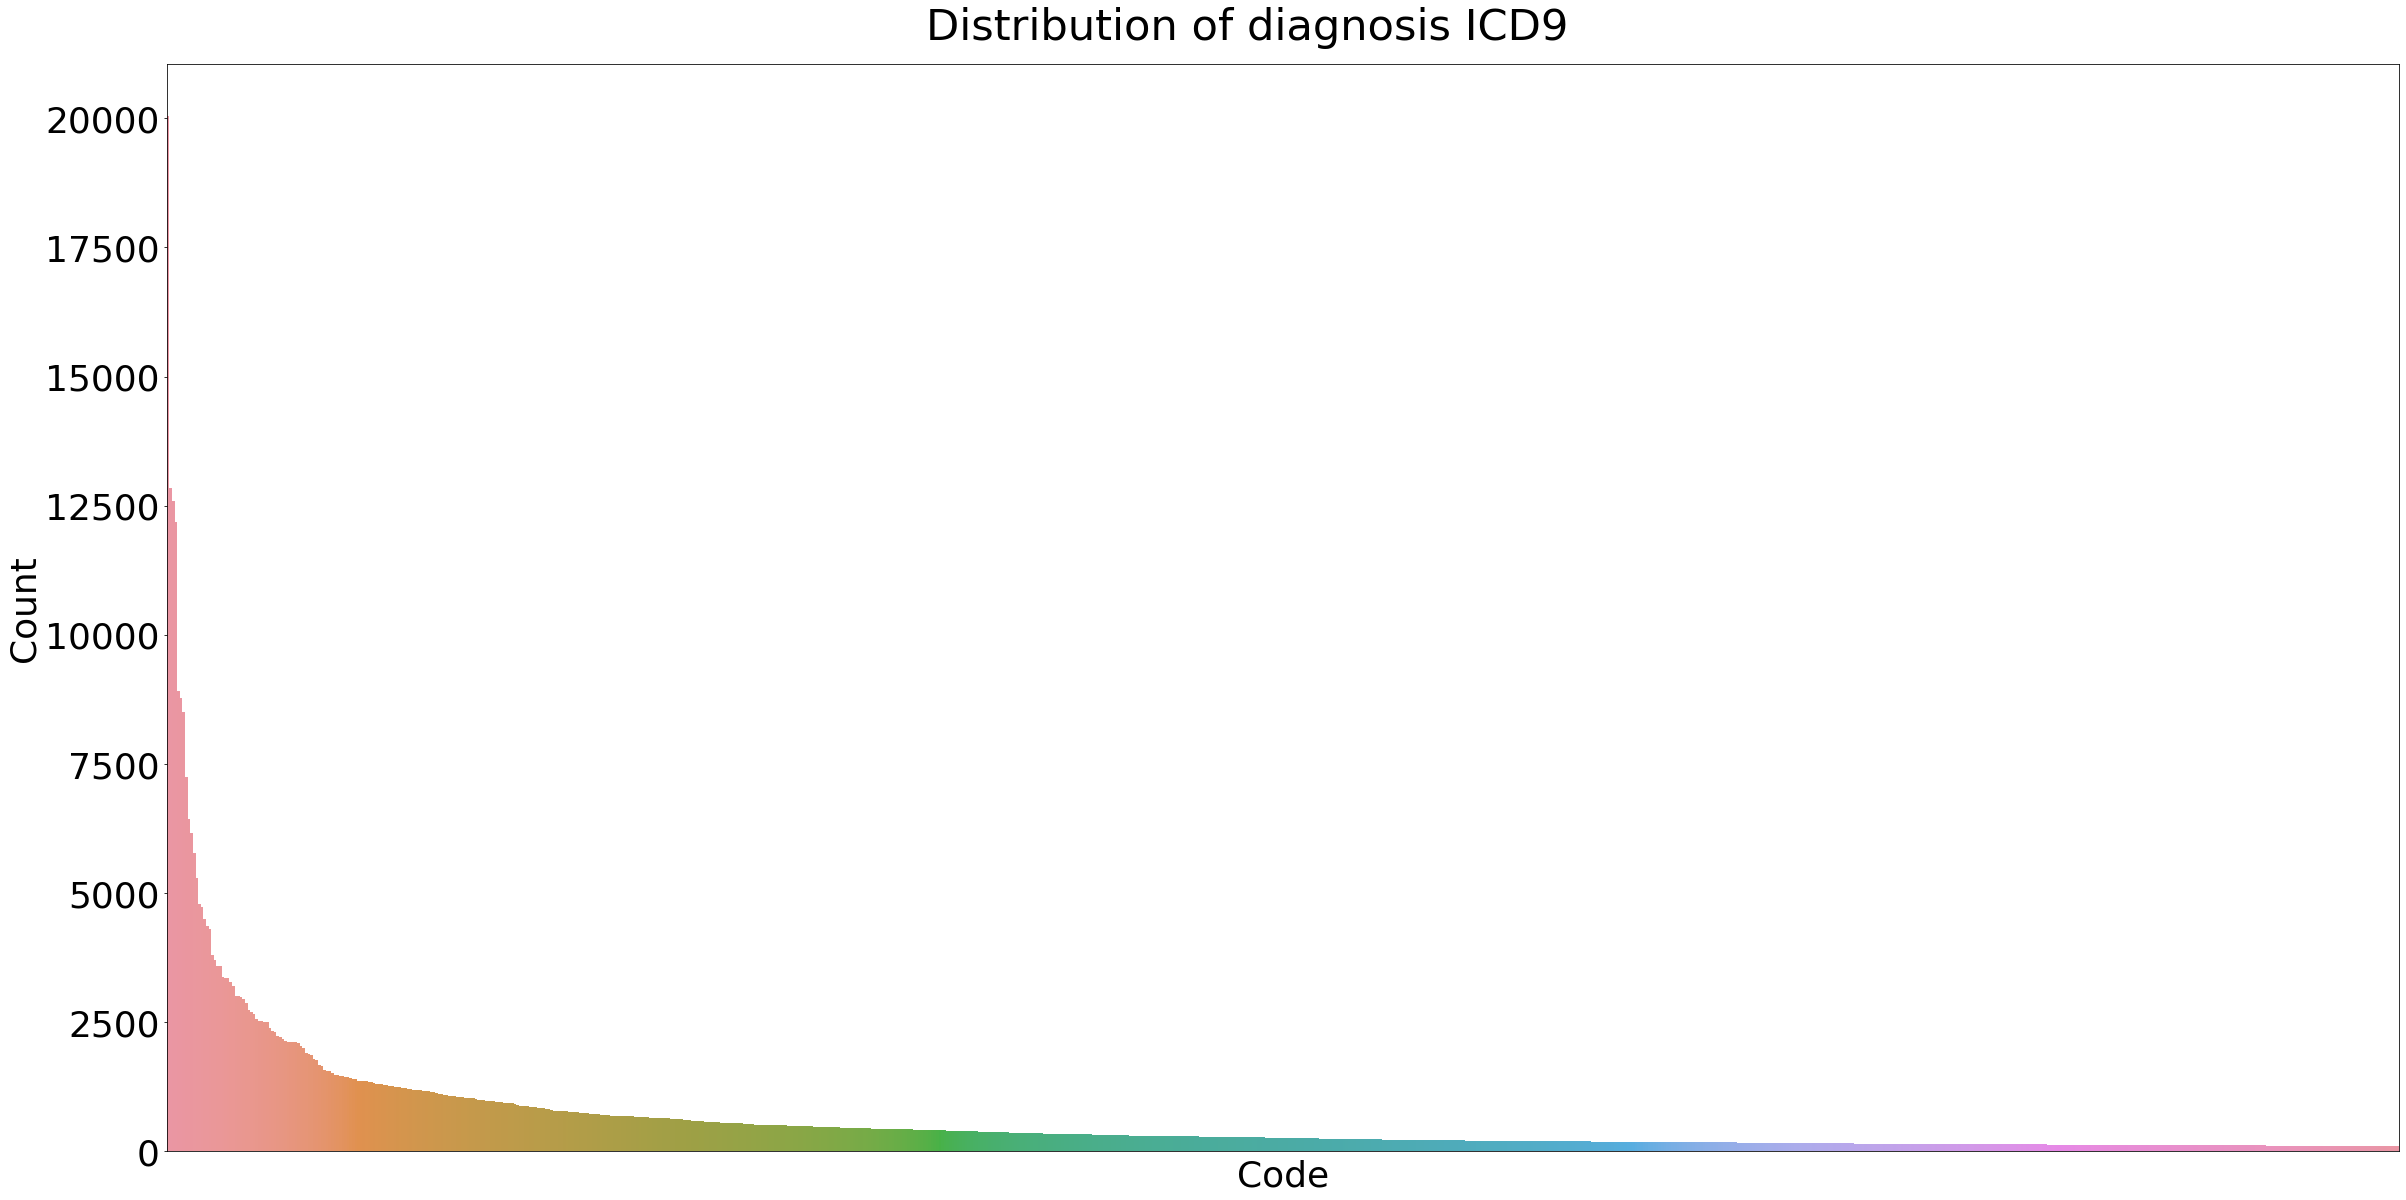

In [19]:
plt.rcParams.update({'font.size': 36})
plt.figure(figsize=(40, 20))
sns.barplot(x=d_icd9_count.index, y=d_icd9_count, width=1.0)
plt.suptitle("Distribution of diagnosis ICD9", y=0.92)
plt.ylabel("Count")
plt.xlabel("Code")
plt.xticks([])
plt.savefig("dicd9_dist.pdf")
plt.show()

In [11]:
p_icd9 = full["PROC_ICD9"].str.get_dummies(sep = " <CEL> ")

In [12]:
p_icd9_count = p_icd9.sum(axis=0).sort_values(ascending=False)
p_icd9_count

3893    12866
9604     9493
966      9102
9671     8426
9904     7102
        ...  
8140        1
4143        1
4191        1
4193        1
3921        1
Length: 2011, dtype: int64

In [13]:
for i in range(len(p_icd9_count)):
    if p_icd9_count[i] <= 100:
        index = i
        break

p_icd9_count = p_icd9_count[:index]
p_icd9_count

3893    12866
9604     9493
966      9102
9671     8426
9904     7102
        ...  
9702      105
3812      102
8309      102
8844      101
8152      101
Length: 244, dtype: int64

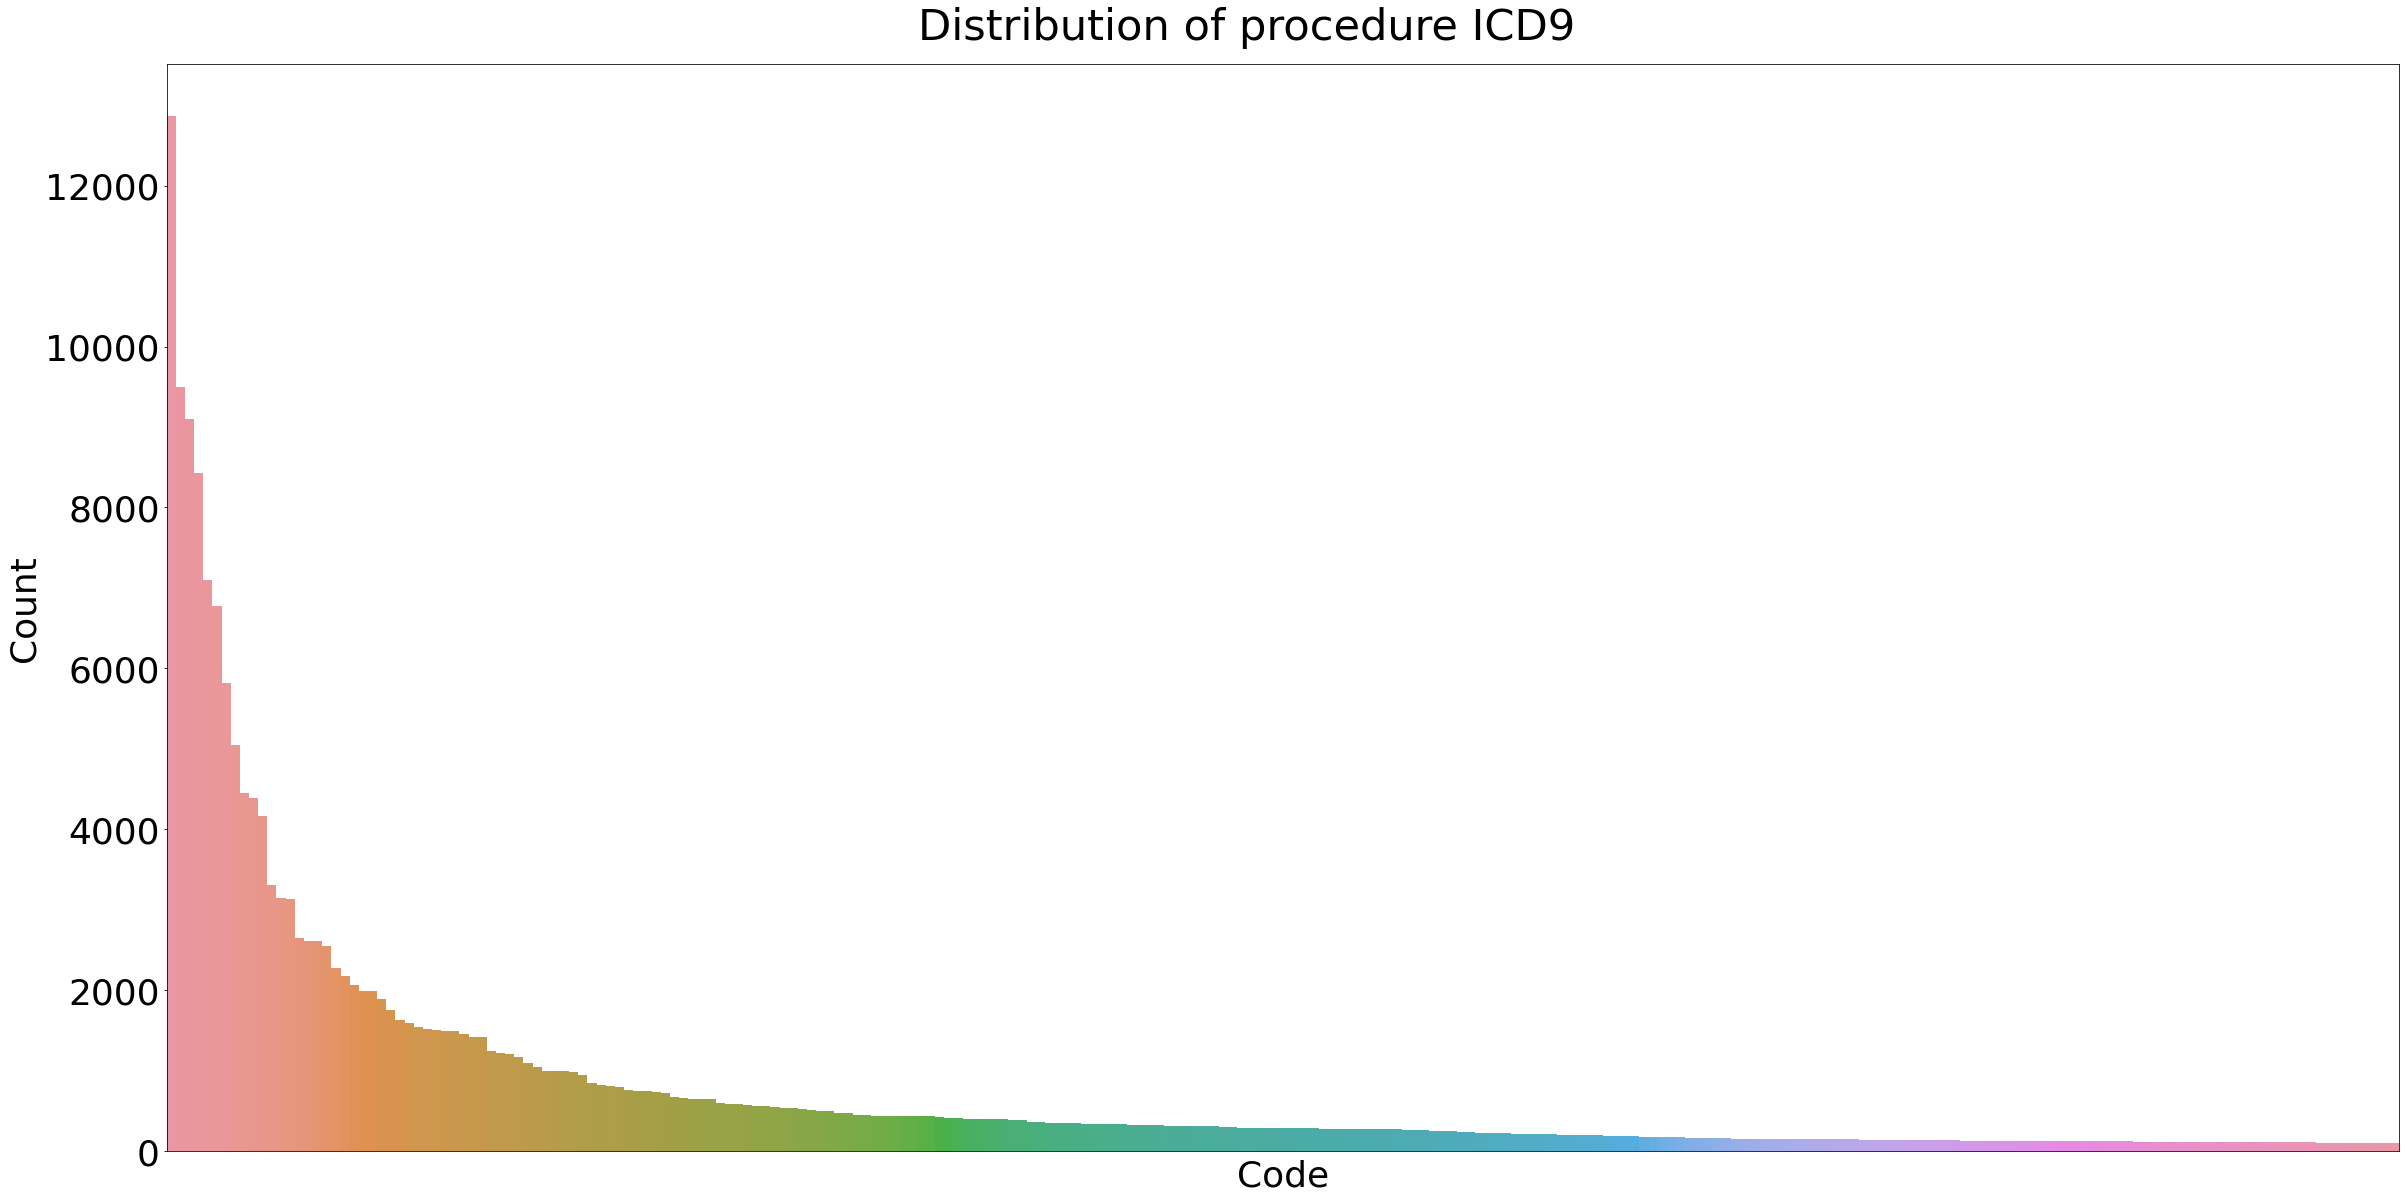

In [20]:
plt.figure(figsize=(40, 20))
sns.barplot(x=p_icd9_count.index, y=p_icd9_count, width=1.0)
plt.suptitle("Distribution of procedure ICD9", y=0.92)
plt.ylabel("Count")
plt.xlabel("Code")
plt.xticks([])
plt.savefig("picd9_dist.pdf")
plt.show()

In [15]:
tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096")

In [16]:
tokenized_ = []
for string in tqdm(full["TEXT"].tolist()):
    tokenized = tokenizer(string, padding=False)
    tokenized_.append(tokenized)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52726/52726 [09:06<00:00, 96.51it/s]


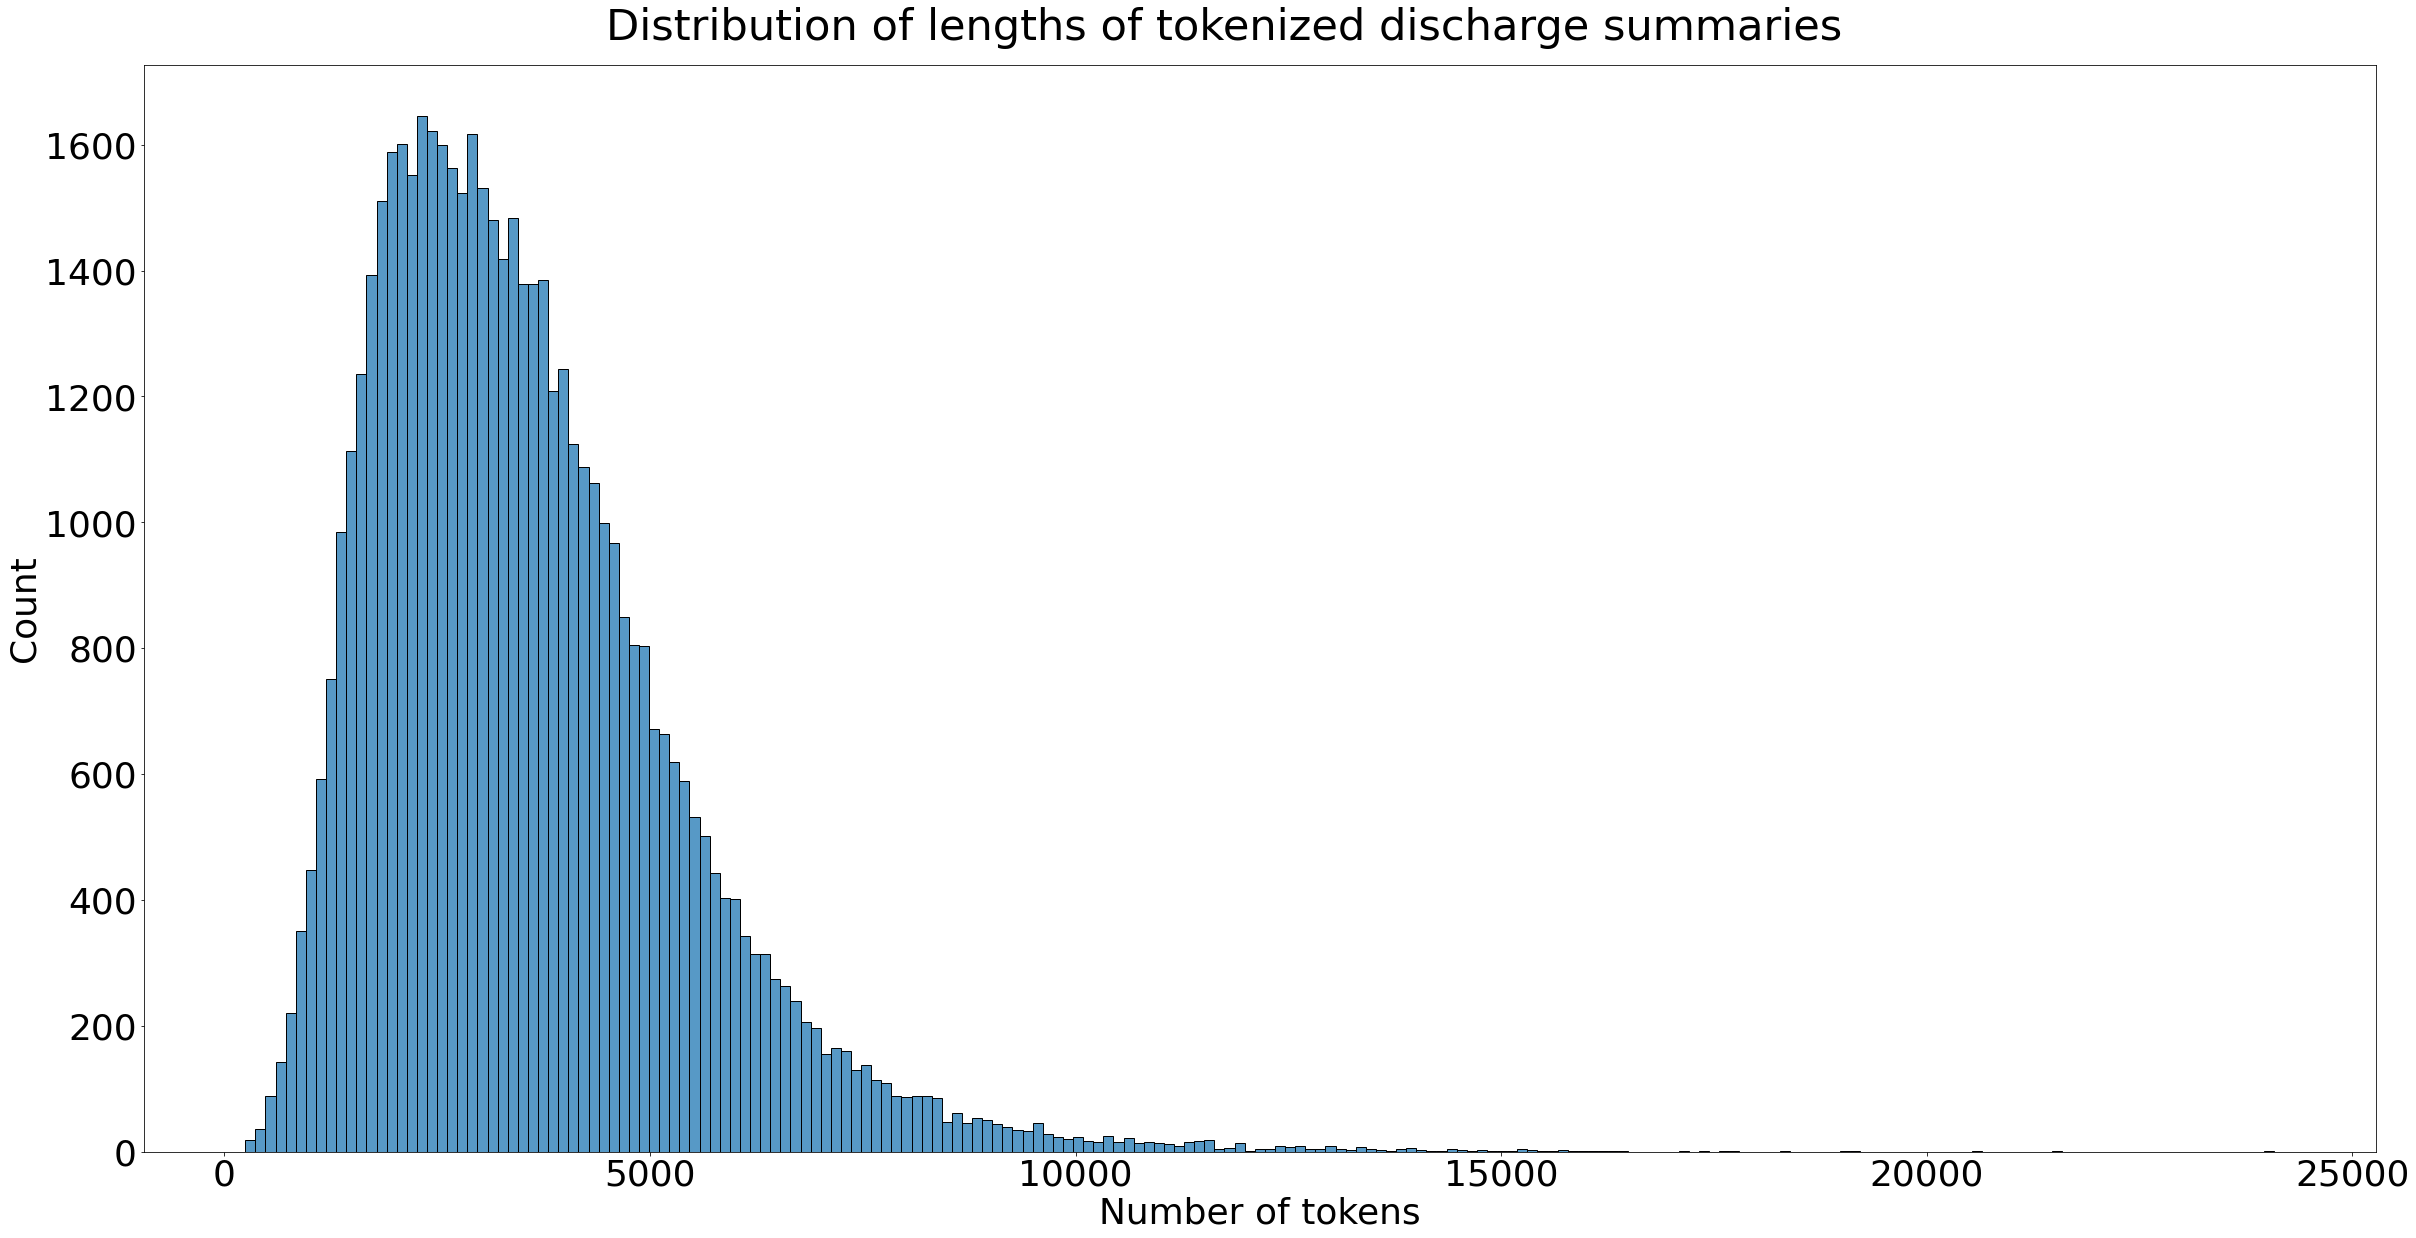

In [21]:
plt.figure(figsize=(40, 20))
sns.histplot(list(map(lambda x: len(x["input_ids"]), tokenized_)))
plt.suptitle("Distribution of lengths of tokenized discharge summaries", y=0.92)
plt.ylabel("Count")
plt.xlabel("Number of tokens")
plt.savefig("token_dist.pdf")
plt.show()